# WeatherPy
----

### Analysis
* As predicted, the temperature increases as latitude approaches the equator at 0 degrees.
* There is no strong relationship between latitude and cloudiness, but the majority of cities from the sample data seem to be at 0% cloudiness, regardless of latitude.
* There is no strong relationship between latitude and wind speed, but most cities tend to have between 0 and 20 mph wind speed.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat = []
lng = []
cities = []

#generate random lat and long combinations
for x in range(0,1200):
    lat.append(np.random.uniform(-90,91))
    lng.append(np.random.uniform(-181,181))

# Identify nearest city for each lat, lng combination
for x in range(0,1200):
    city = citipy.nearest_city(lat[x], lng[x])
    if city.city_name not in cities:
        cities.append(city.city_name)
    
#drop duplicates; set is a list without duplicates
cities = list(set(cities))    

# Print the city count to confirm sufficient count
print(len(cities))

#test out coordinates in https://www.latlong.net/ - all coordinates match nearby cities!

515


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = "1cc185571a2f937159aadcb09eaf4cd6"

city2 = []
lat2 = []
lng2 = []
temp = []
humidity = []
cloud = []
wind = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#need to set counter at 0 so iterrows loop starts at 1 (otherwise, city will start at 2)
counter = 0

print("Beginning data retrieval")
print("---------------------------------------------------------------------")

for x in range(len(cities)):
    counter += 1
    target_url = query_url + cities[x]
    print(f"Processing record {counter} | city name: {cities[x]}")
    print(f"{target_url}")
                  
    try:
        response = requests.get(target_url).json()
        city2.append(response["name"])
        lat2.append(response["coord"]["lat"])
        lng2.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
    except:
        print(f"Weather data does not exist for {city}")
        continue

clean_data = pd.DataFrame({
    "City":city2,
    "Latitude":lat2,
    "Longitude":lng2,
    "Max Temperature":temp,
    "Humidity":humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind
})
        

Beginning data retrieval
---------------------------------------------------------------------
Processing record 1 | city name: oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=oranjemund
Processing record 2 | city name: mayo
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=mayo
Processing record 3 | city name: lasa
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=lasa
Processing record 4 | city name: ahuimanu
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=ahuimanu
Processing record 5 | city name: kallithea
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kallithea
Processing record 6 | city name: hobyo
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=hob

Processing record 51 | city name: vera cruz
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=vera cruz
Processing record 52 | city name: aguimes
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=aguimes
Processing record 53 | city name: vostok
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=vostok
Processing record 54 | city name: shimoda
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=shimoda
Processing record 55 | city name: guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=guerrero negro
Processing record 56 | city name: aklavik
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=aklavik
Processing record 57 | city name: longyearbyen
http://api.openweat

Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 101 | city name: skalistyy
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=skalistyy
Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 102 | city name: corner brook
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=corner brook
Processing record 103 | city name: chase
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=chase
Processing record 104 | city name: rovaniemi
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=rovaniemi
Processing record 105 | city name: mandera
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=mandera
Processing record 106 | city name: asau
http://api.o

Processing record 151 | city name: gisborne
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=gisborne
Processing record 152 | city name: chuy
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=chuy
Processing record 153 | city name: college
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=college
Processing record 154 | city name: alice springs
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=alice springs
Processing record 155 | city name: sedelnikovo
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=sedelnikovo
Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 156 | city name: ekibastuz
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&u

Processing record 201 | city name: olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=olafsvik
Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 202 | city name: antalaha
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=antalaha
Processing record 203 | city name: manga
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=manga
Processing record 204 | city name: nara
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=nara
Processing record 205 | city name: kathmandu
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kathmandu
Processing record 206 | city name: tamandare
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=ta

Processing record 250 | city name: jupiter
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=jupiter
Processing record 251 | city name: norman wells
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=norman wells
Processing record 252 | city name: kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kavaratti
Processing record 253 | city name: barawe
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=barawe
Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 254 | city name: yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=yeppoon
Processing record 255 | city name: busselton
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units

Processing record 300 | city name: hamilton
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=hamilton
Processing record 301 | city name: geraldton
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=geraldton
Processing record 302 | city name: kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kulhudhuffushi
Processing record 303 | city name: victoria
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=victoria
Processing record 304 | city name: lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=lavrentiya
Processing record 305 | city name: ziro
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=ziro
Processing record 306 | city name: bredasdorp
http://a

Processing record 352 | city name: ongandjera
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=ongandjera
Processing record 353 | city name: kodiak
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kodiak
Processing record 354 | city name: waingapu
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=waingapu
Processing record 355 | city name: kirakira
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kirakira
Processing record 356 | city name: khani
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=khani
Processing record 357 | city name: laguna
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=laguna
Processing record 358 | city name: concordia
http://api.openweathermap.org

Processing record 403 | city name: yaqui
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=yaqui
Processing record 404 | city name: nguiu
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=nguiu
Weather data does not exist for <citipy.citipy.City object at 0x0000021CFF06E780>
Processing record 405 | city name: kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kurilsk
Processing record 406 | city name: henties bay
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=henties bay
Processing record 407 | city name: dauriya
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=dauriya
Processing record 408 | city name: komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial

Processing record 454 | city name: pisco
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=pisco
Processing record 455 | city name: qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=qaanaaq
Processing record 456 | city name: bantogon
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=bantogon
Processing record 457 | city name: yima
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=yima
Processing record 458 | city name: kedougou
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kedougou
Processing record 459 | city name: vestmanna
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=vestmanna
Processing record 460 | city name: turki
http://api.openweathermap.org/data/2.

Processing record 505 | city name: jalu
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=jalu
Processing record 506 | city name: paamiut
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=paamiut
Processing record 507 | city name: kaeo
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=kaeo
Processing record 508 | city name: hay river
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=hay river
Processing record 509 | city name: ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=ostrovnoy
Processing record 510 | city name: inyonga
http://api.openweathermap.org/data/2.5/weather?appid=1cc185571a2f937159aadcb09eaf4cd6&units=imperial&q=inyonga
Processing record 511 | city name: eureka
http://api.openweathermap.org/data/2.5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#export dataframe to csv
clean_data.to_csv("CityData.csv")

In [25]:
clean_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Oranjemund,-28.55,16.43,64.63,91,0,25.34
1,Mayo,63.59,-135.90,-14.81,75,5,4.54
2,Lasa,34.92,32.53,60.80,59,40,21.92
3,Ahuimanu,21.44,-157.84,69.80,87,75,14.99
4,Kallithea,37.96,23.70,53.01,50,75,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

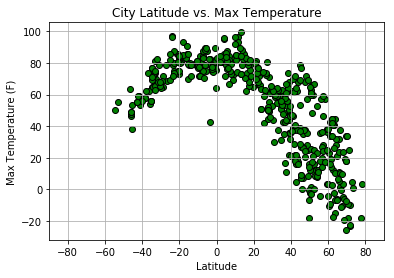

In [26]:
plt.scatter(clean_data["Latitude"], clean_data["Max Temperature"], marker="o", facecolors="green", edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(lat_range)
plt.grid()

plt.savefig("Lat vs Temp.png")

#### Latitude vs. Humidity Plot

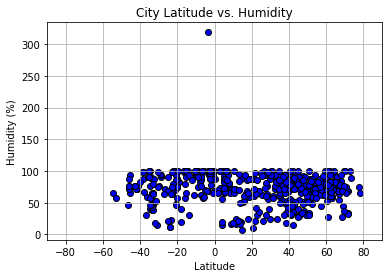

In [27]:
plt.scatter(clean_data["Latitude"], clean_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(lat_range)
plt.grid()

plt.savefig("Lat vs Humid.png")

#### Latitude vs. Cloudiness Plot

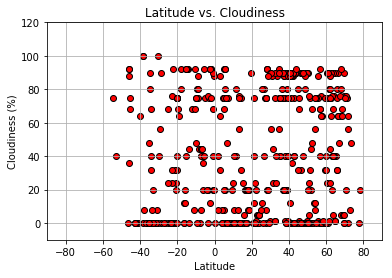

In [31]:
plt.scatter(clean_data["Latitude"], clean_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(lat_range)
plt.ylim(-10,120)
plt.grid()

plt.savefig("Lat vs Clouds.png")

#### Latitude vs. Wind Speed Plot

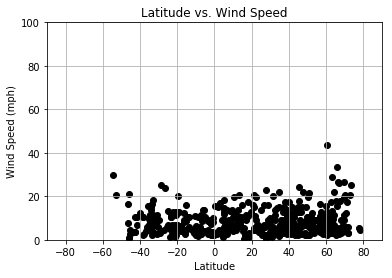

In [29]:
plt.scatter(clean_data["Latitude"], clean_data["Wind Speed"], marker="o", facecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(lat_range)
plt.ylim(0,100)
plt.grid()

plt.savefig("Lat vs Wind.png")